## Сюжет 1: Несколько повторяющихся "похожих" (и, возможно, вместе с тем не самых простых) действий, или Ctrl-C + Ctrl-V с небольшими изменениями

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Уравнение окружности с центром в точке $(x_c, y_c)$ и радиусом $r$:

$$ (x - x_c)^2 + (y - y_c)^2 = r^2 $$

Если выразить $y$ через $x$:

$$ y = y_c \pm \sqrt{r^2 - (x - x_c)^2} $$

###  "Простыня", или "До"

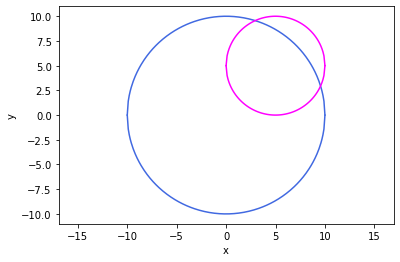

In [2]:
r = 10
x = np.arange(-10, 10.1, 0.1)
y1 = np.sqrt(r ** 2 - x ** 2)
y2 = -np.sqrt(r ** 2 - x ** 2)

plt.plot(x, y1, color='royalblue')
plt.plot(x, y2, color='royalblue')

r = 5
x = np.arange(0, 10.1, 0.1)
y1 = 5 + np.sqrt(r ** 2 - (x - 5) ** 2)
y2 = 5 - np.sqrt(r ** 2 - (x - 5) ** 2)

plt.plot(x, y1, color='fuchsia')
plt.plot(x, y2, color='fuchsia')

plt.xlabel('x')
plt.ylabel('y')

plt.axis('equal')
plt.show()

### Процедурно (Структурно), или "После"

P.S.
Про разницу между терминами "процедурное" и "структурное" программирование рекомендуется почитать мнение по ссылке: https://softwareengineering.stackexchange.com/a/117099/348557 (разницы почти нет).

In [5]:
def plot_circle(x_c, y_c, r, color='k'):
    step = 0.1
    x = np.arange(x_c - r, x_c + r + step, step)

    for sign in [+1, -1]:
        y = y_c + sign * np.sqrt(r ** 2 - (x - x_c) ** 2)

        plt.plot(x, y, color=color)

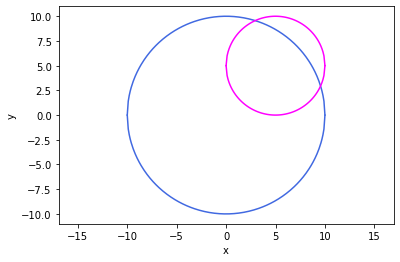

In [6]:
plot_circle(0, 0, r=10, color='royalblue')
plot_circle(5, 5, r=5, color='fuchsia')

plt.xlabel('x')
plt.ylabel('y')

plt.axis('equal')
plt.show()

## Сюжет 2: Всё хорошо, но смысл происходящего ясен не сразу

### "До"

С комментариями, конечно, понятнее, но вместо комментариев лучше разбивать по-нормальному на функции, а комментарии использовать для чего-то "более интересного" (оъяснить то, что иначе просто неоткуда будет узнать: идею, рекомендацию, "планы на будущее" и т.п.)

In [5]:
# Считываем
input_file = open('input.txt')

count = int(input_file.readline())
numbers = list()

for i in range(count):
    n = int(input_file.readline())
    numbers.append(n)

input_file.close()

# Считаем
s = 0

for n in numbers:
    s = s + n

# Записываем ответ
output_file = open('output.txt', 'w')

output_file.write(str(s) + '\n')
output_file.close()

### "После"

In [8]:
def read_numbers(file_path):
    input_file = open(file_path)

    count = int(input_file.readline())
    numbers = []

    for i in range(count):
        n = int(input_file.readline())
        numbers.append(n)

    input_file.close()
    
    return numbers


def calculate(numbers):
    s = 0
    
    for i in range(len(numbers)):
        s = s + numbers[i]
    
    return s


def write_answer(number, file_path):
    output_file = open(file_path, 'w')

    output_file.write(str(number) + '\n')
    output_file.close()

In [9]:
numbers = read_numbers('input.txt')
result = calculate(numbers)
write_answer(result, 'output.txt')

## Сюжет 3: Большая программа из нескольких блоков

P.S. `pygame` может не сразу заработать в ноутбуке 😅 Сложно дать общий совет, что делать в этом случае, но можно попробовать несколько вещей. Первая — скопировать код по рисованию в текстовый .py файл и запустить его из консоли (или из IDE типа PyCharm-а). Если и там не сработает, то... можно попробовать переустановить `pygame`. Или можно создать новый Питон (питоновское окружение, см. [ссылку 1](https://hpc.hse.ru/instructions/python/anaconda) или [ссылку 2](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands)) и установить там `pygame` с нуля. Или... 😅 Сложно сказать) На этом "общие советы" кончаются, и далее надо уже разбираться. Автору ноутбука помогло решение отсюда: https://stackoverflow.com/a/72427700/8094251 (Solution 2).

### Способ 1: "До"

In [1]:
import pygame
from pygame.draw import (
    circle,
    ellipse,
)

pygame.init()


FPS = 30
screen = pygame.display.set_mode((400, 400))


# Рисуем зайца

# Зайцевские параметры
x = 200
y = 200
width = 200
height = 400
color = (255, 240, 245)

# Тело
body_width = width // 2
body_height = height // 2
body_y = y + body_height // 2
ellipse(
    screen, color,
    (x - body_width // 2,
     body_y - body_height // 2, body_width, body_height)
)

# Голова
head_size = height // 4
circle(screen, color, (x, y - head_size // 2), head_size // 2)

# Уши
ear_height = height // 3
ear_width = width // 8
ear_y = y - height // 2 + ear_height // 2
ellipse(
    screen, color,
    (x - head_size // 4 - ear_width // 2,
     ear_y - ear_height // 2, ear_width, ear_height)
)
ellipse(
    screen, color,
    (x + head_size // 4 - ear_width // 2,
     ear_y - ear_height // 2, ear_width, ear_height)
)

# Ноги
leg_height = height // 16
leg_width = width // 4
leg_y = y + height // 2 - leg_height // 2
ellipse(
    screen, color,
    (x - width // 4 - leg_width // 2,
     leg_y - leg_height // 2, leg_width, leg_height)
)
ellipse(
    screen, color,
    (x + width // 4 - leg_width // 2,
     leg_y - leg_height // 2, leg_width, leg_height)
)


# "Наносим" зайца на экран
pygame.display.update()

# Запускаем pygame-штуку, чтобы всё нормально работало
clock = pygame.time.Clock()
finished = False

while not finished:
    clock.tick(FPS)

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            finished = True

pygame.quit()

pygame 2.5.2 (SDL 2.28.2, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Способ 2: "После"

In [2]:
import pygame
from pygame.draw import (
    circle,
    ellipse,
)

pygame.init()


def _get_head_size(height):
    return height // 4


def draw_body(screen, x, y, width, height, color):
    body_width = width // 2
    body_height = height // 2
    body_y = y + body_height // 2

    ellipse(
        screen, color,
        (x - body_width // 2,
         body_y - body_height // 2, body_width, body_height)
    )


def draw_head(screen, x, y, width, height, color):
    head_size = _get_head_size(height)

    circle(screen, color, (x, y - head_size // 2), head_size // 2)


def draw_ear(screen, x, y, width, height, color, left=True):
    head_size = _get_head_size(height)
    ear_height = height // 3
    ear_width = width // 8
    ear_y = y - height // 2 + ear_height // 2
    
    if left:
        sign = -1
    else:
        sign = +1

    ellipse(
        screen, color,
        (x + sign * head_size // 4 - ear_width // 2,
         ear_y - ear_height // 2, ear_width, ear_height)
    )


def draw_ears(screen, x, y, width, height, color):
    draw_ear(screen, x, y, width, height, color, left=True)
    draw_ear(screen, x, y, width, height, color, left=False)


def draw_leg(screen, x, y, width, height, color, left=True):
    leg_height = height // 16
    leg_width = width // 4
    leg_y = y + height // 2 - leg_height // 2

    if left:
        sign = -1
    else:
        sign = +1
    
    ellipse(
        screen, color,
        (x + sign * width // 4 - leg_width // 2,
         leg_y - leg_height // 2, leg_width, leg_height)
    )


def draw_legs(screen, x, y, width, height, color):
    draw_leg(screen, x, y, width, height, color, left=True)
    draw_leg(screen, x, y, width, height, color, left=False)


def draw_hare(screen, x, y, width, height, color):
    draw_body(screen, x, y, width, height, color)
    draw_head(screen, x, y, width, height, color)
    draw_ears(screen, x, y, width, height, color)
    draw_legs(screen, x, y, width, height, color)


def init_screen(size=(400, 400)):
    return pygame.display.set_mode(size)


def run_pygame(fps):
    pygame.display.update()

    clock = pygame.time.Clock()
    finished = False

    while not finished:
        clock.tick(fps)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                finished = True

    pygame.quit()

In [3]:
fps = 30

x = 200
y = 200
width = 200
height = 400
color = (255, 240, 245)

screen = init_screen()
draw_hare(screen, x, y, width, height, color)
run_pygame(fps)